<h1><b> This Notebook can predict if you are obese

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split


In [131]:
#Load the Data
data=pd.read_csv(r"data\Copy of Obesity_Dataset.csv")
data.iloc[:,14]=data.iloc[:,14]-1
data.head()
data.tail()

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
1605,2,51,165,2,1,1,3,4,1,3,1,3,1,1,3
1606,2,51,163,2,1,2,2,4,2,2,2,5,1,1,3
1607,2,52,162,1,2,1,3,4,1,3,1,4,1,1,3
1608,2,53,168,2,1,1,3,4,1,2,2,2,1,1,3
1609,2,54,170,1,1,1,3,4,1,3,2,4,3,1,3


In [132]:
data.columns

Index(['Sex', 'Age', 'Height', 'Overweight_Obese_Family',
       'Consumption_of_Fast_Food', 'Frequency_of_Consuming_Vegetables',
       'Number_of_Main_Meals_Daily', 'Food_Intake_Between_Meals', 'Smoking',
       'Liquid_Intake_Daily', 'Calculation_of_Calorie_Intake',
       'Physical_Excercise', 'Schedule_Dedicated_to_Technology',
       'Type_of_Transportation_Used', 'Class'],
      dtype='object')

In [133]:
for i in range(15):
    print(f"Column{i} : Uniques : {set(data.iloc[:,i])}")

Column0 : Uniques : {1, 2}
Column1 : Uniques : {18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54}
Column2 : Uniques : {150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 190, 191, 193}
Column3 : Uniques : {1, 2}
Column4 : Uniques : {1, 2}
Column5 : Uniques : {1, 2, 3}
Column6 : Uniques : {1, 2, 3}
Column7 : Uniques : {1, 2, 3, 4}
Column8 : Uniques : {1, 2}
Column9 : Uniques : {1, 2, 3}
Column10 : Uniques : {1, 2}
Column11 : Uniques : {1, 2, 3, 4, 5}
Column12 : Uniques : {1, 2, 3}
Column13 : Uniques : {1, 2, 3, 4, 5}
Column14 : Uniques : {0, 1, 2, 3}


<b>For info , Class 1- UnderWeight , Class 2- Normal Weight , Class 3- OverWeight , Class 4- Obese

In [134]:
#Check for any missing values
data.isna().sum()


Sex                                  0
Age                                  0
Height                               0
Overweight_Obese_Family              0
Consumption_of_Fast_Food             0
Frequency_of_Consuming_Vegetables    0
Number_of_Main_Meals_Daily           0
Food_Intake_Between_Meals            0
Smoking                              0
Liquid_Intake_Daily                  0
Calculation_of_Calorie_Intake        0
Physical_Excercise                   0
Schedule_Dedicated_to_Technology     0
Type_of_Transportation_Used          0
Class                                0
dtype: int64

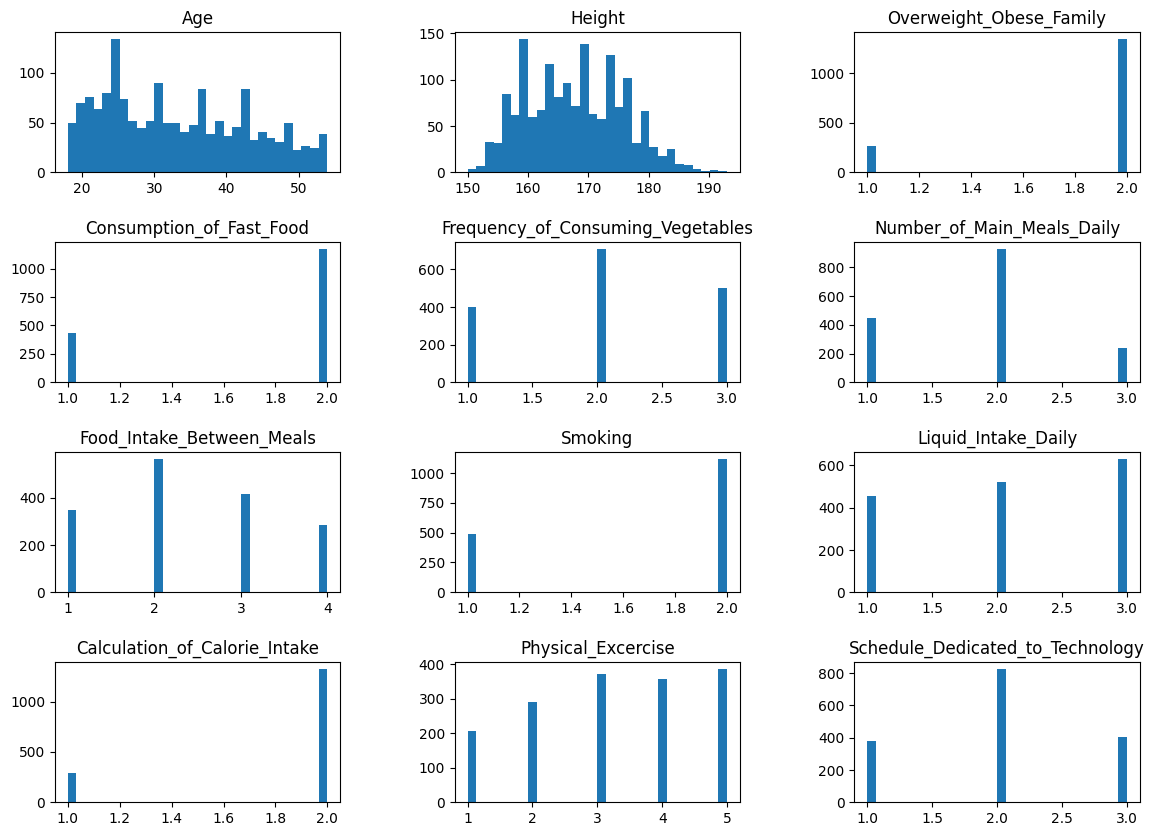

In [135]:
#Plot the histogram for each meaningful data
plt.figure(figsize=(14, 10))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.hist(data.iloc[:,i+1],bins=30)
    plt.title(data.columns[i+1])
plt.subplots_adjust(hspace=0.5, wspace=0.4) 

In [136]:
#Splitting the data into training and testing sets
train_x,test_x,train_y,test_y=train_test_split(np.array(data.iloc[:,0:14]),np.array(data.iloc[:,14]),test_size=0.33)
test_x,test_y

(array([[  2,  49, 157, ...,   1,   2,   1],
        [  1,  30, 174, ...,   3,   2,   4],
        [  2,  22, 156, ...,   3,   3,   3],
        ...,
        [  2,  33, 158, ...,   4,   1,   1],
        [  2,  51, 160, ...,   3,   2,   1],
        [  2,  23, 165, ...,   1,   3,   4]], dtype=int64),
 array([2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 3, 3, 2, 1, 1, 1, 1, 0, 1, 3, 1,
        1, 0, 1, 2, 1, 2, 2, 1, 1, 3, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 3, 2,
        2, 3, 2, 1, 3, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 3, 1, 2, 2,
        3, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 2, 1,
        3, 3, 1, 3, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1,
        1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 3, 2,
        1, 2, 2, 3, 2, 2, 1, 1, 2, 1, 1, 2, 2, 3, 3, 2, 1, 2, 2, 1, 1, 3,
        1, 3, 1, 1, 1, 3, 2, 1, 1, 1, 3, 3, 2, 3, 2, 1, 1, 1, 2, 1, 2, 3,
        3, 0, 2, 0, 1, 2, 3, 1, 1, 3, 1, 1, 2, 3, 0, 2, 3, 1, 1, 1, 1, 1,
        3, 3, 2, 1, 1, 1, 2, 2, 1, 3

In [137]:
#Standarizing the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(train_x)
train_x=scaler.transform(train_x)

test_x=scaler.transform(test_x)


In [138]:
#Lets try SVC
from sklearn.svm import SVC

SVCmodel=SVC()
SVCmodel.fit(train_x,train_y)


SVC()

In [139]:
#Predict
y_pred=SVCmodel.predict(test_x)

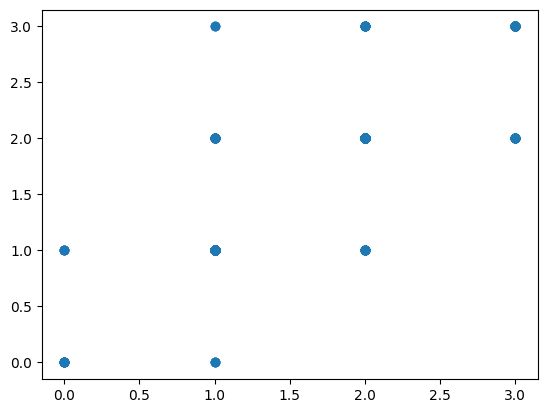

In [140]:
plt.scatter(test_y,y_pred)

In [141]:
#Check the accuracy
corr=0
for i in range(len(y_pred)):
    if (y_pred[i]==test_y[i]):
        corr+=1
print(f"Accuracy: {corr*100/len(y_pred)}")

Accuracy: 78.00751879699249


<b> This is not a great accuracy score , so let's move on to complex models

In [142]:
#Lets try random forest classifier
from sklearn.ensemble import RandomForestClassifier
RFmodel=RandomForestClassifier(n_estimators=100,max_depth=None,random_state=32)
RFmodel.fit(train_x,train_y)

RandomForestClassifier(random_state=32)

In [143]:
#Test the classifier
y_pred=RFmodel.predict(test_x)

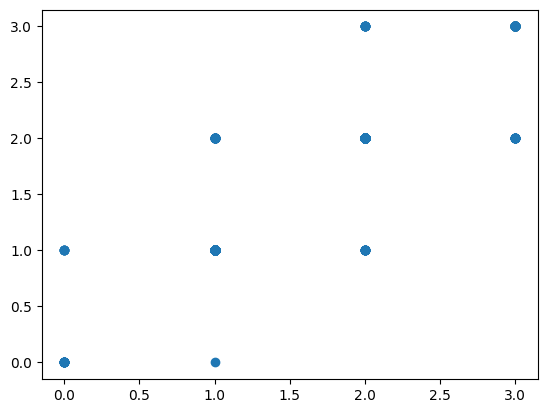

In [144]:
plt.scatter(test_y,y_pred)

In [145]:
corr=0
for i in range(len(y_pred)):
    if (y_pred[i]==test_y[i]):
        corr+=1
print(f"Accuracy: {corr*100/len(y_pred)}")

Accuracy: 85.71428571428571


<b> The accuracy seemed to have increased by a great margin after using RFC , let's still see if we can do any better

In [146]:
#Lets use a neural network
class ObesityClassifier(nn.Module):
    def __init__(self,lr,neurons):
        super(ObesityClassifier,self).__init__()
        self.lr=lr
        #Define the layers
        self.model=nn.Sequential(nn.Linear(14,neurons),
                                nn.ReLU(),
                                nn.Linear(neurons,neurons),
                                nn.ReLU(),
                                nn.Linear(neurons,neurons),
                                nn.ReLU(),
                                 nn.Linear(neurons,4))
        #Define the optimizer
        self.optimizer=torch.optim.SGD(params=self.parameters(),momentum=0.6,lr=self.lr)

    def forward(self,x):
        return self.model(x)

        

In [147]:
#Init the model
NNmodel=ObesityClassifier(0.01,60)
NNmodel

ObesityClassifier(
  (model): Sequential(
    (0): Linear(in_features=14, out_features=60, bias=True)
    (1): ReLU()
    (2): Linear(in_features=60, out_features=60, bias=True)
    (3): ReLU()
    (4): Linear(in_features=60, out_features=60, bias=True)
    (5): ReLU()
    (6): Linear(in_features=60, out_features=4, bias=True)
  )
)

In [148]:
train_x=torch.tensor(train_x,dtype=torch.float32)
train_y=torch.tensor(train_y,dtype=torch.long)
test_x=torch.tensor(test_x,dtype=torch.float32)
test_y=torch.tensor(test_y,dtype=torch.long)


In [149]:
#Training Loop
epoch=15000
loss_fn=nn.CrossEntropyLoss()
for i in range(epoch):
    y_pred=NNmodel.forward(train_x)
    loss=loss_fn(y_pred,train_y)
    NNmodel.optimizer.zero_grad()
    loss.backward()
    NNmodel.optimizer.step()
    if(i%500==0):
        print(f'Epoch {i + 1}, Loss: {loss.item():.4f}')
   

Epoch 1, Loss: 1.3373
Epoch 501, Loss: 0.7065
Epoch 1001, Loss: 0.5787
Epoch 1501, Loss: 0.4955
Epoch 2001, Loss: 0.4251
Epoch 2501, Loss: 0.3593
Epoch 3001, Loss: 0.2927
Epoch 3501, Loss: 0.2299
Epoch 4001, Loss: 0.1757
Epoch 4501, Loss: 0.1323
Epoch 5001, Loss: 0.0986
Epoch 5501, Loss: 0.0735
Epoch 6001, Loss: 0.0550
Epoch 6501, Loss: 0.0420
Epoch 7001, Loss: 0.0327
Epoch 7501, Loss: 0.0257
Epoch 8001, Loss: 0.0204
Epoch 8501, Loss: 0.0165
Epoch 9001, Loss: 0.0137
Epoch 9501, Loss: 0.0114
Epoch 10001, Loss: 0.0097
Epoch 10501, Loss: 0.0083
Epoch 11001, Loss: 0.0071
Epoch 11501, Loss: 0.0062
Epoch 12001, Loss: 0.0055
Epoch 12501, Loss: 0.0049
Epoch 13001, Loss: 0.0044
Epoch 13501, Loss: 0.0040
Epoch 14001, Loss: 0.0036
Epoch 14501, Loss: 0.0033


In [150]:
#Testing Loop
NNmodel.eval()
y_predT=NNmodel.forward(test_x)
y_predT=torch.argmax(y_predT,axis=1)


In [151]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [152]:
accuracy = accuracy_score(test_y.numpy(), y_predT.numpy())
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion matrix
conf_matrix = confusion_matrix(test_y.numpy(), y_predT.numpy())
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 75.38%
Confusion Matrix:
[[ 15   3   0   0]
 [  6 183  37   8]
 [  0  20 141  27]
 [  1   4  25  62]]


 <h1> It seems Random Forest Vastly Outperformed the Neural Network , so Random Forest Is the best fit

<h1>Best Accuracy : 86.46%